C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

 MSE = 139176465.01367894 
 R2 =0.12539120236863355 
 MAE = 9147.177402778987
  RMSE = 11797.30753238547


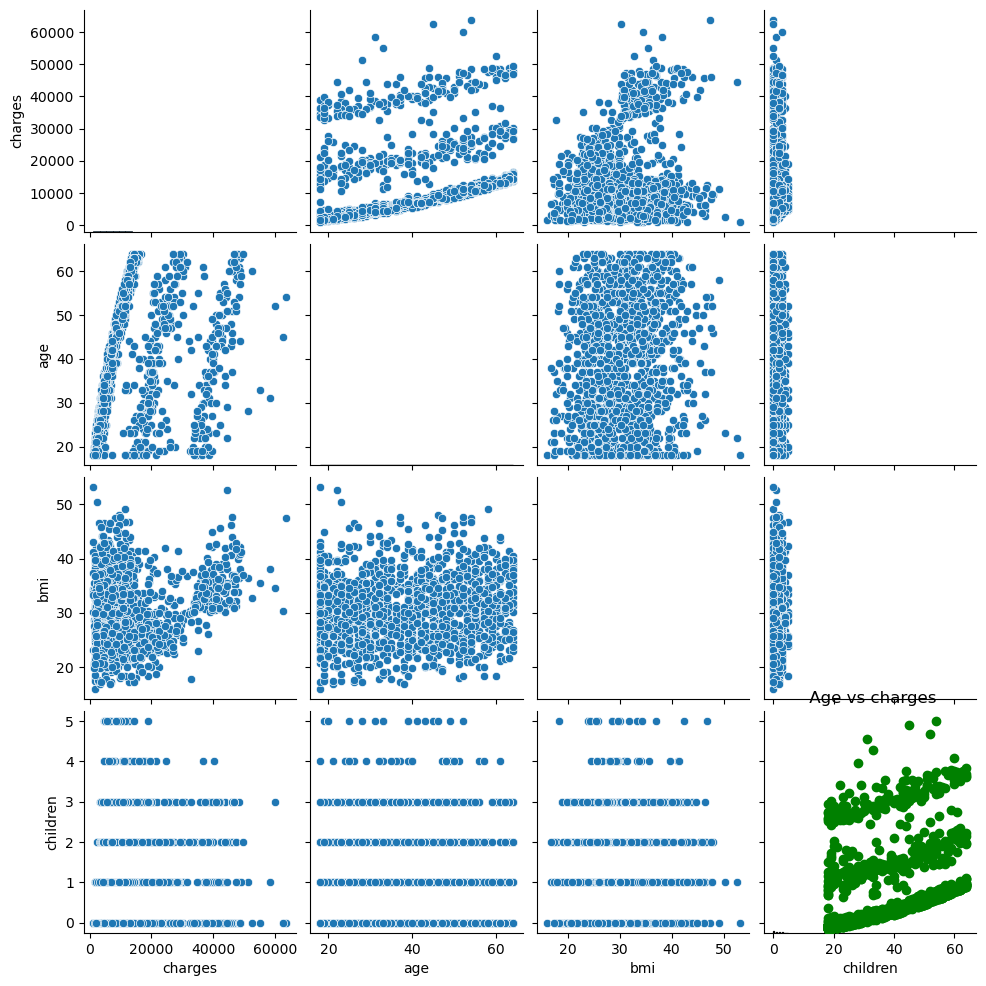

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

#load our dataset
data1 = pd.read_csv('insurance.csv')
data1.head(2)

#remove unnecessary column
data = data1.drop(['sex', 'smoker', 'region'], axis =1 )


#define ou variables
y = data['charges']
x = data[['age', 'bmi', 'children']]

#identify relationship among our data
correlation_matrix = data.corr()

# Select the variables to include in the scatter plot matrix
# Create the scatter plot matrix
scatter_vars = ['charges', 'age', 'bmi', 'children']
sns.pairplot(data[scatter_vars])
#plt.show()

# chose one target variable ##### AGE ###
plt.scatter(x = data['age'], y = data['charges'], color = 'green')
plt.title(' Age vs charges')
plt.xlabel('Age in (Years)')
plt.ylabel('charges in USD')


### initiate model ##
x = data[['age']]
y = data['charges']
md = LinearRegression()
md.fit(x, y)


# split and train my data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#initiate the model and fit to train data
lm = LinearRegression()
lm.fit(x_train, y_train)


# let us do some prediction 
y_pred = lm.predict(x_test)


#compute the slope and intercept 
# our equation of line will be like Y = ax + b
a = lm.coef_
b = lm.intercept_

#test our model 
#calculate the metrics
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f' MSE = {MSE} \n R2 ={R2} \n MAE = {MAE}\n  RMSE = {RMSE}')